In [1]:
import pandas as pd

# Load the splits
df_val = pd.read_parquet("data/validation.parquet")
df_labeled = pd.read_parquet("data/labeled.parquet")
df_unlabeled = pd.read_parquet("data/unlabeled.parquet")

# Add a column to identify source
df_val["split"] = "validation"
df_labeled["split"] = "labeled"
df_unlabeled["split"] = "unlabeled"

# Merge into one DataFrame
df_all = pd.concat([df_val, df_labeled, df_unlabeled], ignore_index=True)

# Show overview
df_all.head()

,label,title,content,split
0,0,A big waste of money,I waited to get enough money to buy this game ...,validation
1,1,Loved it!,"Tall, Dark & Hungry was another hot, sexy and ...",validation
2,1,Buy It!,Though there are disparaging reviews about thi...,validation
3,0,3-wire configuration is common - this switch r...,A year ago I replaced a fan switch with one of...,validation
4,0,It's going back!,I orderd this lens a few days ago and I am not...,validation


In [8]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    4000 non-null   int64 
 1   title    4000 non-null   object
 2   content  4000 non-null   object
 3   split    4000 non-null   object
 4   text     4000 non-null   object
 5   tokens   4000 non-null   object
dtypes: int64(1), object(5)
memory usage: 187.6+ KB


In [9]:
df_all.describe()

,label
count,4000.000000
mean,0.500000
std,0.500063
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


(4000, 4)
label      0
title      0
content    0
split      0
dtype: int64


<Axes: title={'center': 'Class Balance by Split'}, xlabel='split'>

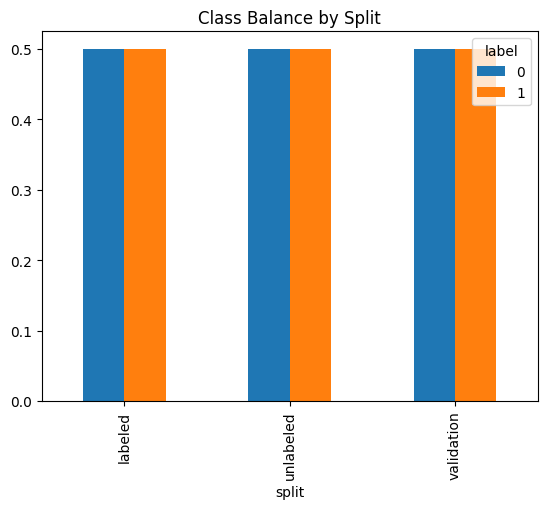

In [2]:
# Check shape and nulls
print(df_all.shape)
print(df_all.isnull().sum())

# Label distribution by split
df_all.groupby("split")["label"].value_counts(normalize=True).unstack().plot(kind="bar", title="Class Balance by Split")

In [3]:
from collections import Counter
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download("punkt")
nltk.download("stopwords")

# Combine title + content into one text field
df_all["text"] = df_all["title"] + " " + df_all["content"]

# Basic cleaning function
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    words = word_tokenize(text)
    stop_words = set(stopwords.words("english"))
    return [word for word in words if word not in stop_words and len(word) > 2]

# Get all tokens
all_words = []
df_all["tokens"] = df_all["text"].apply(lambda x: clean_text(x))
df_all["tokens"].apply(lambda x: all_words.extend(x))

# Show top 20 words
Counter(all_words).most_common(20)

[nltk_data] Downloading package punkt to /home/arian/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /home/arian/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('book', 2052),
 ('one', 1432),
 ('great', 1184),
 ('good', 1167),
 ('like', 1142),
 ('would', 963),
 ('get', 781),
 ('read', 694),
 ('time', 689),
 ('dont', 670),
 ('movie', 662),
 ('really', 623),
 ('first', 567),
 ('well', 561),
 ('even', 561),
 ('much', 556),
 ('love', 544),
 ('buy', 504),
 ('better', 502),
 ('product', 465)]

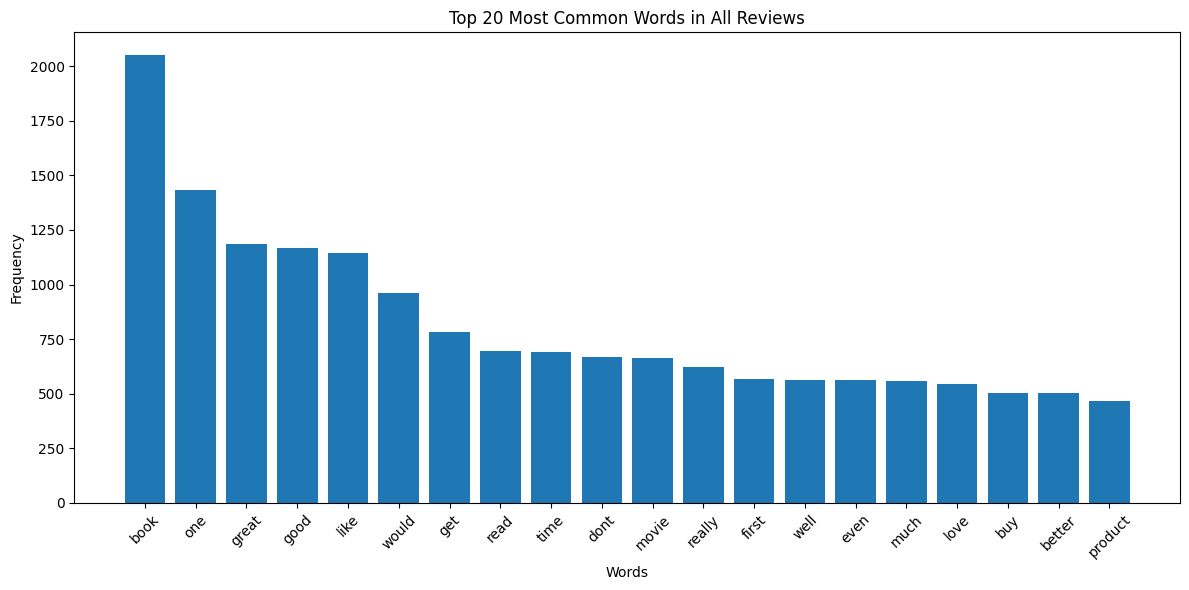

In [5]:
from collections import Counter
import matplotlib.pyplot as plt

# Count all words
word_counts = Counter()
df_all["tokens"].apply(word_counts.update)

# Get the 20 most common words
most_common_words = word_counts.most_common(20)

# Split words and counts
words, counts = zip(*most_common_words)

# Plot
plt.figure(figsize=(12, 6))
plt.bar(words, counts)
plt.title("Top 20 Most Common Words in All Reviews")
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

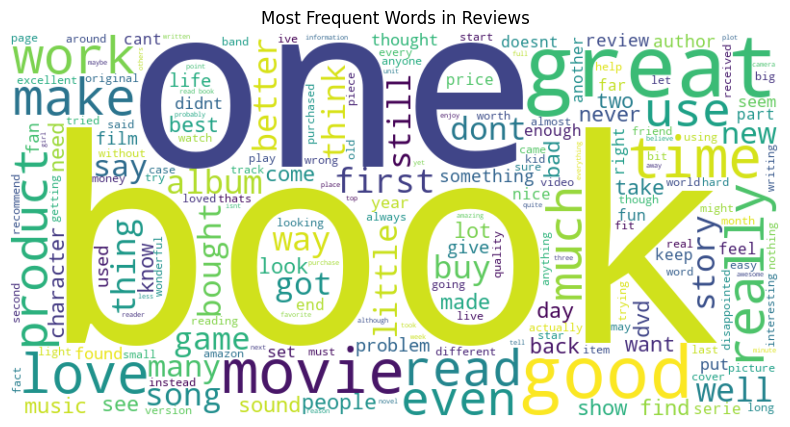

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all tokens
text_blob = " ".join(all_words)

# Generate word cloud
wc = WordCloud(width=800, height=400, background_color="white").generate(text_blob)

# Display
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Most Frequent Words in Reviews")
plt.show()


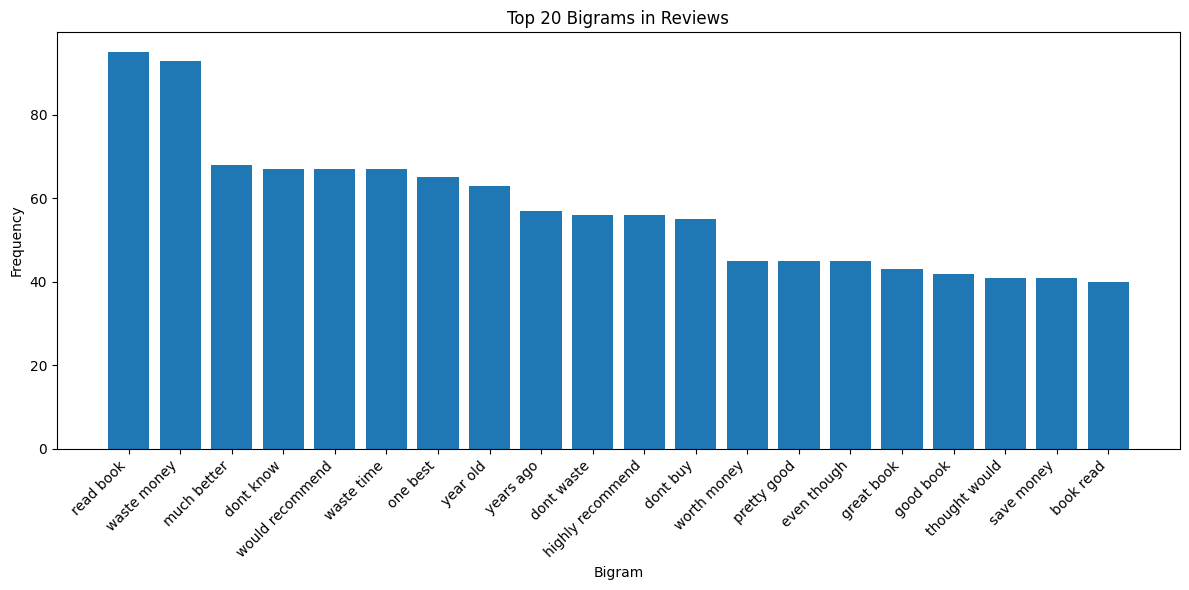

In [6]:
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt

# Extract bigrams from all tokens
all_bigrams = []
df_all["tokens"].apply(lambda tokens: all_bigrams.extend(ngrams(tokens, 2)))

# Count bigrams
bigram_freq = Counter(all_bigrams).most_common(20)

# Plot bigrams
bigram_labels = [" ".join(b) for b, _ in bigram_freq]
bigram_counts = [c for _, c in bigram_freq]

plt.figure(figsize=(12, 6))
plt.bar(bigram_labels, bigram_counts)
plt.xticks(rotation=45, ha="right")
plt.title("Top 20 Bigrams in Reviews")
plt.xlabel("Bigram")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

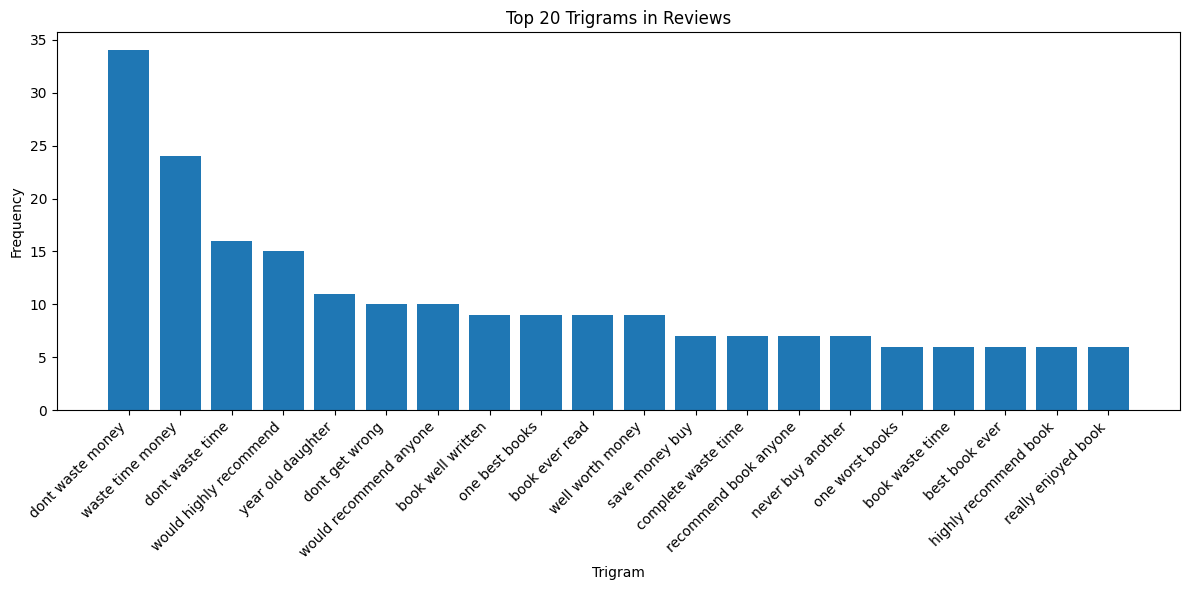

In [7]:
# Extract trigrams from all tokens
all_trigrams = []
df_all["tokens"].apply(lambda tokens: all_trigrams.extend(ngrams(tokens, 3)))

# Count trigrams
trigram_freq = Counter(all_trigrams).most_common(20)

# Plot trigrams
trigram_labels = [" ".join(t) for t, _ in trigram_freq]
trigram_counts = [c for _, c in trigram_freq]

plt.figure(figsize=(12, 6))
plt.bar(trigram_labels, trigram_counts)
plt.xticks(rotation=45, ha="right")
plt.title("Top 20 Trigrams in Reviews")
plt.xlabel("Trigram")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()